## Data

In [64]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset_IC_certo.csv', sep=';')

<ipython-input-64-ec0e27e7be2c>:3: DtypeWarning: Columns (4,11,18,19,20,21,22,27,28,31,32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset_IC_certo.csv', sep=';')


## Remove missing data


In [65]:
df.isna().sum()

,0
Unnamed: 0,0
sintomas,334
racaCor,21583
outrosSintomas,3292526
outrasCondicoes,6240233
cbo,6081056
condicoes,5733568
sexo,41
estado,61
estadoIBGE,1234517


## Drop high missing-rate columns

In [66]:
threshold = 0.9 * len(df)
df = df.loc[:, df.isna().sum() < threshold]

## Drop missing-value records

In [67]:
df.dropna(inplace=True)

## Drop columns

In [68]:
df.drop(df.columns[[14, 24]], axis=1, inplace=True)

In [69]:
df.drop(df.columns[[0, 10]], axis=1, inplace=True)

In [70]:
df.drop(df.columns[[5, 7, 9, 10, 26]], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50360 entries, 876563 to 6379912
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sintomas                      50360 non-null  object 
 1   racaCor                       50360 non-null  object 
 2   outrosSintomas                50360 non-null  object 
 3   condicoes                     50360 non-null  object 
 4   sexo                          50360 non-null  object 
 5   estadoIBGE                    50360 non-null  object 
 6   municipioIBGE                 50360 non-null  object 
 7   municipioNotificacaoIBGE      50360 non-null  float64
 8   classificacaoFinal            50360 non-null  object 
 9   codigoLaboratorioSegundaDose  50360 non-null  object 
 10  lotePrimeiraDose              50360 non-null  object 
 11  loteSegundaDose               50360 non-null  object 
 12  codigoDosesVacina             50360 non-null  object 
 13 

In [72]:
df.drop(df.columns[[3]], axis=1, inplace=True)

In [73]:
df.columns

Index(['sintomas', 'racaCor', 'outrosSintomas', 'sexo', 'estadoIBGE',
       'municipioIBGE', 'municipioNotificacaoIBGE', 'classificacaoFinal',
       'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose',
       'codigoDosesVacina', 'estadoNotificacaoIBGE', 'totalTestesRealizados',
       'dataNotificacao', 'dataInicioSintomas', 'dataPrimeiraDose',
       'dataSegundaDose', 'codigoResultadoTeste1', 'dataColetaTeste1',
       'idade'],
      dtype='object')

In [74]:
df.drop(df.columns[[18, 19]], axis=1, inplace=True)

## Select the two main labels

In [75]:
df['classificacaoFinal'].unique()

array(['Descartado', 'Confirmado Laboratorial',
       'Confirmado Clínico-Epidemiológico',
       'Síndrome Gripal Não Especificada', 'Confirmado Clínico-Imagem',
       'Confirmado por Critério Clínico'], dtype=object)

In [76]:
df = df[df['classificacaoFinal'].isin(['Confirmado Laboratorial', 'Descartado'])]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50048 entries, 876563 to 6379912
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sintomas                      50048 non-null  object 
 1   racaCor                       50048 non-null  object 
 2   outrosSintomas                50048 non-null  object 
 3   sexo                          50048 non-null  object 
 4   estadoIBGE                    50048 non-null  object 
 5   municipioIBGE                 50048 non-null  object 
 6   municipioNotificacaoIBGE      50048 non-null  float64
 7   classificacaoFinal            50048 non-null  object 
 8   codigoLaboratorioSegundaDose  50048 non-null  object 
 9   lotePrimeiraDose              50048 non-null  object 
 10  loteSegundaDose               50048 non-null  object 
 11  codigoDosesVacina             50048 non-null  object 
 12  estadoNotificacaoIBGE         50048 non-null  object 
 13 

In [78]:
df.head()

,sintomas,racaCor,outrosSintomas,sexo,estadoIBGE,municipioIBGE,municipioNotificacaoIBGE,classificacaoFinal,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataPrimeiraDose,dataSegundaDose,idade
876563,Outros,Parda,Dor de cabeca,Feminino,PE,2609006,2609006.0,Descartado,ASTRAZENECA/FIOCRUZ,215VCD147W,217VCD230Z,"1,2",PE,2.0,2021-05-27,2021-05-07,2021-06-16,2021-08-23,50.0
877201,Tosse,Parda,Dor de garganta,Masculino,PE,2605707,2605707.0,Descartado,PFIZER,FA7478,FF8843,"2,1",PE,1.0,2021-11-19,2021-11-15,2021-06-07,2021-09-28,31.0
877409,Tosse,Parda,Outros,Masculino,PE,2611101,2611101.0,Confirmado Laboratorial,SINOVAC/BUTANTAN,210417,210480,"1,2",PE,1.0,2021-11-10,2021-11-06,2021-09-09,2021-10-28,20.0
877697,Dor de garganta,Branca,"Coriza, outros",Feminino,PE,2611606,2611606.0,Descartado,PFIZER,EX2405,FD7209,"1,2",PE,1.0,2021-11-11,2021-11-10,2021-05-21,2021-08-27,49.0
877721,Tosse,Parda,Coriza,Feminino,PE,2611606,2611606.0,Descartado,ASTRAZENECA FIOCRUZ- SI INDIA,213VCD012Z,216VCD186Z,"2,1",PE,1.0,2021-10-06,2021-10-05,2021-04-16,2021-07-10,1.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50048 entries, 876563 to 6379912
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sintomas                      50048 non-null  object 
 1   racaCor                       50048 non-null  object 
 2   outrosSintomas                50048 non-null  object 
 3   sexo                          50048 non-null  object 
 4   estadoIBGE                    50048 non-null  object 
 5   municipioIBGE                 50048 non-null  object 
 6   municipioNotificacaoIBGE      50048 non-null  float64
 7   classificacaoFinal            50048 non-null  object 
 8   codigoLaboratorioSegundaDose  50048 non-null  object 
 9   lotePrimeiraDose              50048 non-null  object 
 10  loteSegundaDose               50048 non-null  object 
 11  codigoDosesVacina             50048 non-null  object 
 12  estadoNotificacaoIBGE         50048 non-null  object 
 13 

## Inspect labels distribution

In [80]:
df['classificacaoFinal'].value_counts()

,count
classificacaoFinal,
Descartado,36079
Confirmado Laboratorial,13969


In [81]:
confirmed_df = df[df["classificacaoFinal"] == "Confirmado Laboratorial"]
discarded_df = df[df["classificacaoFinal"] == "Descartado"]

balanced_df = pd.concat(
    [
        confirmed_df.sample(n=10_000, random_state=42),
        discarded_df.sample(n=10_000, random_state=42),
    ]
)

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(
    drop=True
)

In [82]:
balanced_df['todosSintomas'] = balanced_df['sintomas'].str.upper() + ', ' + balanced_df['outrosSintomas'].str.upper()

balanced_df.drop(['sintomas', 'outrosSintomas'], axis=1, inplace=True)

In [83]:
balanced_df.head()

,racaCor,sexo,estadoIBGE,municipioIBGE,municipioNotificacaoIBGE,classificacaoFinal,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataPrimeiraDose,dataSegundaDose,idade,todosSintomas
0,Branca,Masculino,PE,2611606.0,2611606.0,Descartado,SINOVAC/BUTANTAN,210344,210453,"1,2,3",PE,1.0,2024-02-16,2024-02-07,2021-08-12,2021-09-26,36.0,"FEBRE, DISTURBIOS OLFATIVOS, OUTROS"
1,Parda,Feminino,PE,2604106.0,2604106.0,Confirmado Laboratorial,ASTRAZENECA,214VCD054Z,210197,"2,1",PE,1.0,2022-06-22,2022-06-20,2021-05-14,2021-08-20,52.0,"TOSSE, CORIZA, DOR DE GARGANTA, OUTROS"
2,Parda,Feminino,PE,2615300.0,2615300.0,Confirmado Laboratorial,SINOVAC/BUTANTAN,210080,210114,"1,2",PE,1.0,2022-02-04,2022-02-04,2021-03-24,2021-04-14,30.0,"FEBRE, CORIZA, TOSSE, DOR DE GARGANTA, OUTROS"
3,Parda,Feminino,PE,2611606.0,2611606.0,Confirmado Laboratorial,ASTRAZENECA/FIOCRUZ,214VCD107Z,217VCD234Z,"1,2",PE,1.0,2022-02-03,2022-01-28,2021-06-06,2021-08-30,37.0,"TOSSE, CORIZA, DOR DE CABECA, DOR DE GARGANTA,..."
4,Branca,Masculino,PE,2611606.0,2613701.0,Descartado,PFIZER,EW0199,FD7209,"1,2",PE,1.0,2022-04-12,2022-04-09,2021-05-29,2021-08-27,42.0,"TOSSE, DOR DE CABECA, DOR DE GARGANTA"


# Encode string-based categorical data#

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [85]:
balanced_df['racaCor'] = label_encoder.fit_transform(balanced_df['racaCor'])
balanced_df['sexo'] = label_encoder.fit_transform(balanced_df['sexo'])
balanced_df['estadoIBGE'] = label_encoder.fit_transform(balanced_df['estadoIBGE'])
balanced_df['classificacaoFinal'] = label_encoder.fit_transform(balanced_df['classificacaoFinal'])
balanced_df['codigoLaboratorioSegundaDose'] = label_encoder.fit_transform(balanced_df['codigoLaboratorioSegundaDose'])
balanced_df['lotePrimeiraDose'] = label_encoder.fit_transform(balanced_df['lotePrimeiraDose'])
balanced_df['loteSegundaDose'] = label_encoder.fit_transform(balanced_df['loteSegundaDose'])
balanced_df['estadoNotificacaoIBGE'] = label_encoder.fit_transform(balanced_df['estadoNotificacaoIBGE'])


In [86]:
balanced_df.head()

,racaCor,sexo,estadoIBGE,municipioIBGE,municipioNotificacaoIBGE,classificacaoFinal,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataPrimeiraDose,dataSegundaDose,idade,todosSintomas
0,1,1,4,2611606.0,2611606.0,1,21,92,113,"1,2,3",0,1.0,2024-02-16,2024-02-07,2021-08-12,2021-09-26,36.0,"FEBRE, DISTURBIOS OLFATIVOS, OUTROS"
1,4,0,4,2604106.0,2604106.0,0,3,157,71,"2,1",0,1.0,2022-06-22,2022-06-20,2021-05-14,2021-08-20,52.0,"TOSSE, CORIZA, DOR DE GARGANTA, OUTROS"
2,4,0,4,2615300.0,2615300.0,0,21,47,42,"1,2",0,1.0,2022-02-04,2022-02-04,2021-03-24,2021-04-14,30.0,"FEBRE, CORIZA, TOSSE, DOR DE GARGANTA, OUTROS"
3,4,0,4,2611606.0,2611606.0,0,5,182,201,"1,2",0,1.0,2022-02-03,2022-01-28,2021-06-06,2021-08-30,37.0,"TOSSE, CORIZA, DOR DE CABECA, DOR DE GARGANTA,..."
4,1,1,4,2611606.0,2613701.0,1,13,262,271,"1,2",0,1.0,2022-04-12,2022-04-09,2021-05-29,2021-08-27,42.0,"TOSSE, DOR DE CABECA, DOR DE GARGANTA"


In [87]:
balanced_df["municipioIBGE"] = pd.to_numeric(balanced_df["municipioIBGE"]).astype(int)
balanced_df['municipioNotificacaoIBGE'] = pd.to_numeric(balanced_df['municipioNotificacaoIBGE']).astype(int)
balanced_df['totalTestesRealizados'] = pd.to_numeric(balanced_df['totalTestesRealizados']).astype(int)


In [88]:
balanced_df['dataNotificacao'] = pd.to_datetime(balanced_df['dataNotificacao'])
balanced_df['dataInicioSintomas'] = pd.to_datetime(balanced_df['dataInicioSintomas'])
balanced_df['dataPrimeiraDose'] = pd.to_datetime(balanced_df['dataPrimeiraDose'])
balanced_df['dataSegundaDose'] = pd.to_datetime(balanced_df['dataSegundaDose'])

balanced_df['dataNotificacao'] = balanced_df['dataNotificacao'].apply(lambda x: x.timestamp())
balanced_df['dataInicioSintomas'] = balanced_df['dataInicioSintomas'].apply(lambda x: x.timestamp())
balanced_df['dataPrimeiraDose'] = balanced_df['dataPrimeiraDose'].apply(lambda x: x.timestamp())
balanced_df['dataSegundaDose'] = balanced_df['dataSegundaDose'].apply(lambda x: x.timestamp())

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

balanced_df["dataNotificacao"] = scaler.fit_transform(
    balanced_df["dataNotificacao"].values.reshape(-1, 1)
)
balanced_df["dataInicioSintomas"] = scaler.fit_transform(
    balanced_df["dataInicioSintomas"].values.reshape(-1, 1)
)
balanced_df["dataPrimeiraDose"] = scaler.fit_transform(
    balanced_df["dataPrimeiraDose"].values.reshape(-1, 1)
)
balanced_df["dataSegundaDose"] = scaler.fit_transform(
    balanced_df["dataSegundaDose"].values.reshape(-1, 1)
)

In [90]:
balanced_df["codigoDosesVacina"] = balanced_df["codigoDosesVacina"].str.split(",")
balanced_df["todosSintomas"] = (
    balanced_df["todosSintomas"]
    .str.split(",")
    .apply(lambda x: list(set(item.strip().upper() for item in x)))
)

In [91]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_label_binarizer = MultiLabelBinarizer()

In [92]:
dose_ordinals = {
    1: 'primeira',
    2: 'segunda',
    3: 'terceira',
    4: 'quarta',
}

# Função para converter as doses usando o dicionário
def get_dose_ordinal(n):
    return dose_ordinals.get(n, "Dose")


def to_camel_case(s: str) -> str:
    parts = s.lower().split()
    camel_case_string = parts[0] + "".join(word.capitalize() for word in parts[1:])
    return camel_case_string


encoded_doses = multi_label_binarizer.fit_transform(balanced_df["codigoDosesVacina"])
encoded_doses_df = pd.DataFrame(
    encoded_doses,
    columns=[f"{get_dose_ordinal(int(n))}Dose" for n in multi_label_binarizer.classes_],
)

encoded_symptoms = multi_label_binarizer.fit_transform(balanced_df["todosSintomas"])
encoded_symptoms_df = pd.DataFrame(
    encoded_symptoms,
    columns=[to_camel_case(sintoma) for sintoma in multi_label_binarizer.classes_],
)

balanced_df = pd.concat(
    [balanced_df, encoded_doses_df, encoded_symptoms_df], axis=1
).drop(["codigoDosesVacina", "todosSintomas"], axis=1)

In [93]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   racaCor                       20000 non-null  int64  
 1   sexo                          20000 non-null  int64  
 2   estadoIBGE                    20000 non-null  int64  
 3   municipioIBGE                 20000 non-null  int64  
 4   municipioNotificacaoIBGE      20000 non-null  int64  
 5   classificacaoFinal            20000 non-null  int64  
 6   codigoLaboratorioSegundaDose  20000 non-null  int64  
 7   lotePrimeiraDose              20000 non-null  int64  
 8   loteSegundaDose               20000 non-null  int64  
 9   estadoNotificacaoIBGE         20000 non-null  int64  
 10  totalTestesRealizados         20000 non-null  int64  
 11  dataNotificacao               20000 non-null  float64
 12  dataInicioSintomas            20000 non-null  float64
 13  d

In [94]:
from sklearn.model_selection import train_test_split

X = balanced_df.drop("classificacaoFinal", axis=1)
y = balanced_df["classificacaoFinal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pd.concat([X_train, y_train], axis=1).to_csv("symptoms-only-train.csv", index=False)
pd.concat([X_test, y_test], axis=1).to_csv("symptoms-only-test.csv", index=False)

In [95]:
import pandas as pd

symptoms_only_train_df = pd.read_csv("symptoms-only-train.csv")
symptoms_only_test_df = pd.read_csv("symptoms-only-test.csv")


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

symptomns_only_dtc = DecisionTreeClassifier()

symptomns_only_param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

symptomns_only_grid_search = GridSearchCV(
    estimator=symptomns_only_dtc,
    param_grid=symptomns_only_param_grid,
    cv=5,
    scoring="accuracy",
)

In [97]:
(
    symptomns_only_X_train,
    symptomns_only_y_train,
    symptomns_only_X_test,
    symptomns_only_y_test,
) = (
    symptoms_only_train_df.drop("classificacaoFinal", axis=1),
    symptoms_only_train_df["classificacaoFinal"],
    symptoms_only_test_df.drop("classificacaoFinal", axis=1),
    symptoms_only_test_df["classificacaoFinal"],
)

In [98]:
symptomns_only_grid_search.fit(symptomns_only_X_train, symptomns_only_y_train)

symptomns_only_best_model = symptomns_only_grid_search.best_estimator_

# Visualização

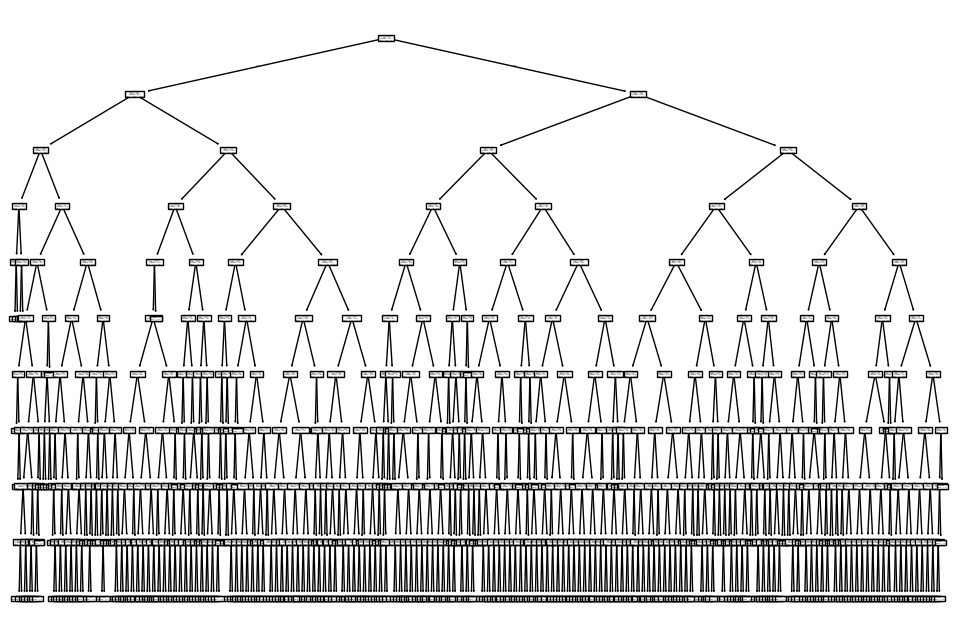

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(symptomns_only_best_model)
plt.show()

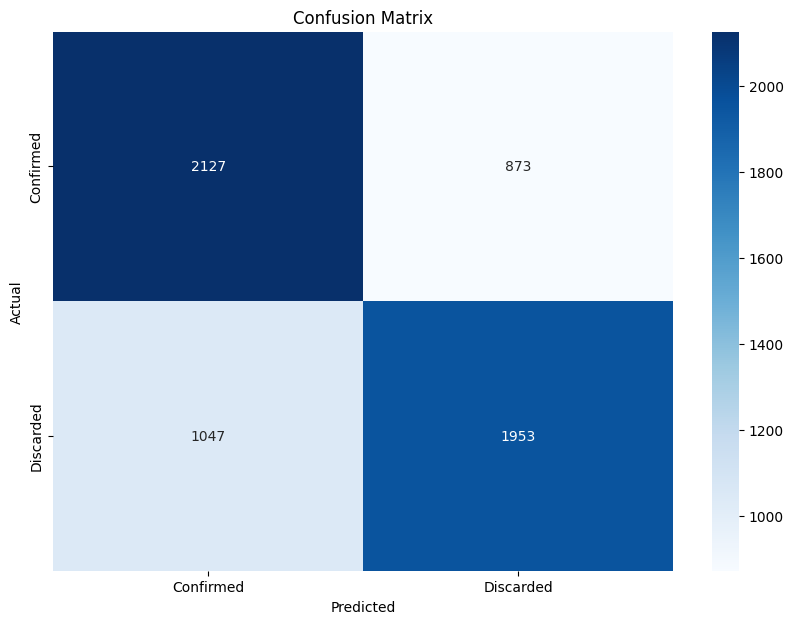

In [100]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

symptomns_only_y_pred = symptomns_only_best_model.predict(symptomns_only_X_test)

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_true=symptomns_only_y_test, y_pred=symptomns_only_y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Confirmed", "Discarded"],
    yticklabels=["Confirmed", "Discarded"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

{'Accuracy': 68.0, 'Precision': 68.06075638447739, 'Recall': 68.0, 'F1 Score': 67.97306534795763, 'ROC AUC': 68.0}


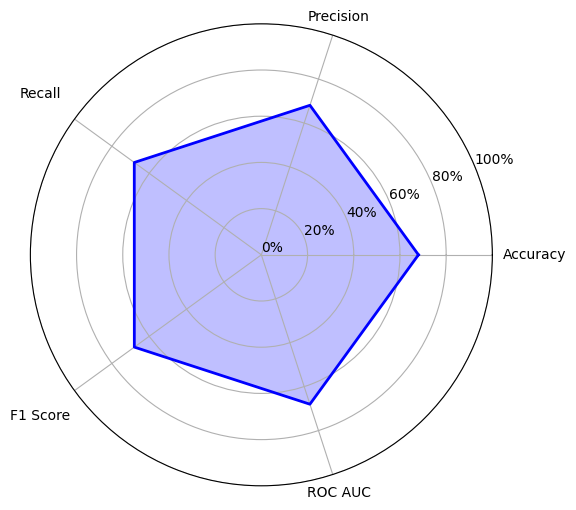

In [101]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

symptomns_only_report = classification_report(
    y_true=symptomns_only_y_test, y_pred=symptomns_only_y_pred, output_dict=True
)
symptomns_only_roc_auc = (
    roc_auc_score(symptomns_only_y_test, symptomns_only_y_pred) * 100
)

symptomns_only_metrics = {
    "Accuracy": symptomns_only_report["accuracy"] * 100,
    "Precision": symptomns_only_report["weighted avg"]["precision"] * 100,
    "Recall": symptomns_only_report["weighted avg"]["recall"] * 100,
    "F1 Score": symptomns_only_report["weighted avg"]["f1-score"] * 100,
    "ROC AUC": symptomns_only_roc_auc,
}

print(symptomns_only_metrics)

symptomns_only_labels = list(symptomns_only_metrics.keys())
symptomns_only_values = list(symptomns_only_metrics.values())

symptomns_only_angles = np.linspace(
    0, 2 * np.pi, len(symptomns_only_labels), endpoint=False
).tolist()

symptomns_only_values += symptomns_only_values[:1]
symptomns_only_angles += symptomns_only_angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(symptomns_only_angles, symptomns_only_values, color="blue", alpha=0.25)
ax.plot(symptomns_only_angles, symptomns_only_values, color="blue", linewidth=2)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f"{i}%" for i in np.arange(0, 101, 20)])
ax.set_xticks(symptomns_only_angles[:-1])
ax.set_xticklabels(
    symptomns_only_labels,
)

for label, angle in zip(ax.get_xticklabels(), symptomns_only_angles[:-1]):
    if label.get_text() in ["Accuracy", "Recall", "F1 Score"]:
        label.set_rotation(45)
        label.set_rotation_mode("anchor")
        label.set_va("center")
        label.set_ha("center")
        label.set_position((label.get_position()[0], label.get_position()[1] + -0.1))

plt.show()